# Tarefa - Álgebra Linear

A célula abaixo gera dados de notas de duas provas, p1 e p2, conforme em aula, mas com mais alunos.

## 1. Reduzindo correlações

a) Já vimos que expressar os dados através da média e diferença é uma transformação linear. Obtenha a média e a diferença através de uma multiplicação matricial, conforme visto em aula.

b) Calcule a correlação entre os dados da **p1** e **p2**

c) Calcule a correlação entre os dados transformados (média e diferença)

d) Comente as correlações observadas.

In [27]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Gerando os dados
np.random.seed(123)

p1 = np.random.random(50) *10
p1[p1>10] = 10
p1[p1<0] = 0

p2 = p1 + np.random.normal(0,1,50)
p2[p2>10] = 10
p2[p2<0] = 0

df = pd.DataFrame({'p1': p1, 'p2': p2})

In [ ]:
# A. Obtendo a média e a diferença através de uma multiplicação matricial

# Matriz de transformação
m = np.array([[ .5,.5],
              [ -1, 1]])

# Realizando a multiplicação matricial

df_mat = pd.DataFrame(np.matmul(m, df[['p1', 'p2']].to_numpy().transpose())).transpose()

df_mat.columns = ["média", "diferença"]

df_mat

In [ ]:
# B - Calculando a correlação entre os dados da p1 e p2

df[['p1', 'p2']].corr()

,p1,p2
p1,1.000000,0.895737
p2,0.895737,1.000000


In [47]:
# C - Calculando a correlação entre os dados transformados (média e diferença)

df_mat.corr()

,média,diferença
média,1.000000,0.133474
diferença,0.133474,1.000000


*Há uma forte correlação entre as variáveis 'p1' e 'p2', enquanto há uma fraca correlação entre as variáveis 'média' e 'diferença'.*

## 2. Soma e diferença

Realize agora uma transformação semelhante, mas que ao invés da média, dê a soma da **p1** e **p2**. Construa o gráfico e conclua que diferenças visuais você observa.

In [ ]:
# Obtendo a diferença e a soma através de uma multiplicação matricial

# Matriz de segunda transformação

s = np.array([[ -1, 1],
              [ 1, 1]])

# Realizando a multiplicação matricial

df_soma = pd.DataFrame(np.matmul(s, df[['p1', 'p2']].to_numpy().transpose())).transpose()

df_soma.columns = ["diferença", "soma"]

df_soma

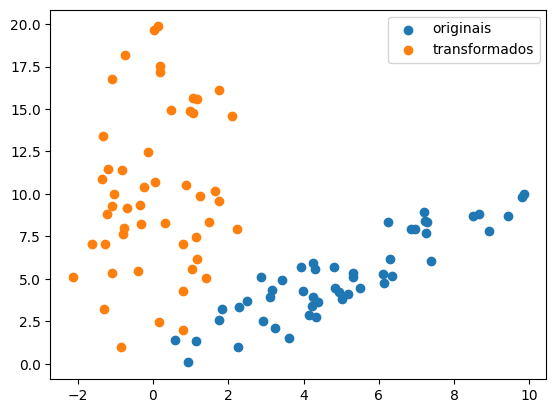

In [64]:
# Construindo gráfico

# Plotando os dados originais
plt.scatter(df['p1'], df['p2'], label='originais')

# Plotando os dados transformados
plt.scatter(df_soma['diferença'], df_soma['soma'], label='transformados')

plt.legend()

In [65]:
df_soma.corr()

,diferença,soma
diferença,1.000000,0.133474
soma,0.133474,1.000000


*Os segundos dados transformados não acrescentam novas informações aos obtidos anteriormente, já que as variáveis "média" e "soma" são autocorrelacionadas*


